## Hyper-parameter Tuning for Improving Generalized Performance

### Data Preprocessing for Gradient Descent

We preprocess the data using the following normalization (standardization):

$$ x_j' = \frac{x_j - \mu_j}{\sigma_{j}} $$

Also, we need to look into the unit of a feature if your gradient behavior is against your expectation.

In [14]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

H = tf.matmul(X, W) + b
S = tf.nn.softmax(H)

loss_i = tf.nn.softmax_cross_entropy_with_logits(logits=H, labels=Y)
loss = tf.reduce_mean(loss_i) 

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

is_correct = tf.equal(tf.arg_max(S, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

# one epoch = one forward pass and backward pass of all training instance
# batch size = the number of training examples in one f/b pass

#with tf.Session() as sess:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([loss, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch

    print('Epoch: ', '%04d' % (epoch + 1), "cost = ", '{:.9f}'.format(avg_cost))

print("Accuracy: ", accuracy.eval(session=sess, 
                                  feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  0001 cost =  1.187334335
Epoch:  0002 cost =  0.592843584
Epoch:  0003 cost =  0.502938267
Epoch:  0004 cost =  0.454558649
Epoch:  0005 cost =  0.423473037
Epoch:  0006 cost =  0.400738826
Epoch:  0007 cost =  0.381952957
Epoch:  0008 cost =  0.368761120
Epoch:  0009 cost =  0.356245184
Epoch:  0010 cost =  0.346943913
Epoch:  0011 cost =  0.338018738
Epoch:  0012 cost =  0.330490313
Epoch:  0013 cost =  0.324368779
Epoch:  0014 cost =  0.318709040
Epoch:  0015 cost =  0.313496173
Accuracy:  0.9112


### Sample image show and prediction

Label:  [1]
Prediction: [1]


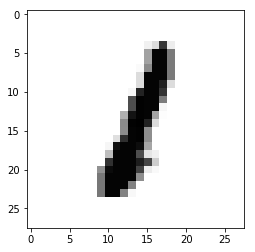

In [16]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(S, 1), 
                            feed_dict={X: mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="Greys", interpolation="nearest")
plt.show()